In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to python environment

In [3]:
data=pd.read_excel('C:/Users/USER/Desktop/iris.xls')

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do the necessary pre-processing steps

In [11]:
data.isna().sum() # to check the missing values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
# here we have some missing values in 3 columns( SL,SW,PL),we have several methods to deal the missing values like,drop the rows, replace the values with suitable average etc. but now am going with fillna method

In [12]:
data['SL'].fillna(method='ffill',inplace=True)
data['SW'].fillna(method='ffill',inplace=True)
data['PL'].fillna(method='ffill',inplace=True)
# to fill the missing objects 

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
# all the missing objects are now filled


In [15]:
# we have encode the column Classification for further calculations,for that am using the label encoding method

In [16]:
from sklearn.preprocessing import LabelEncoder 

In [17]:
le=LabelEncoder()

In [28]:
data['Classification']=le.fit_transform(data['Classification']) # to encode the classification column

In [29]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.9,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
data.corr()#checking for multicollinearity

,SL,SW,PL,PW,Classification
SL,1.000000,-0.141941,0.866358,0.817304,0.794873
SW,-0.141941,1.000000,-0.419379,-0.355965,-0.420520
PL,0.866358,-0.419379,1.000000,0.961409,0.948970
PW,0.817304,-0.355965,0.961409,1.000000,0.956464
Classification,0.794873,-0.420520,0.948970,0.956464,1.000000


<AxesSubplot:>

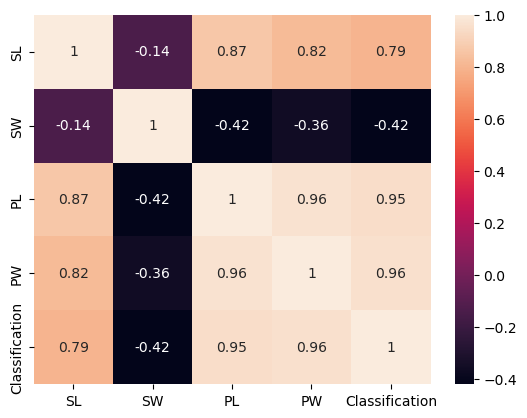

In [32]:
sns.heatmap(data.corr(),annot=True)

In [33]:
# we can see that there is a high positive ccorrelation between petel length and width ;petel length and sepel length;petel width and sepel length; PW,PL,SL with classification

# 3. Find out which classification model gives the best result


#1)Logistic Regression model

In [35]:
y=data['Classification']#target
x=data.drop('Classification',axis=1)#x contains features

In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression#Logistic Regression is present in linear_model
lr=LogisticRegression()#creating an instance

In [189]:
model=lr.fit(x_train,y_train)# model creation

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
y_pred=model.predict(x_test)#y predictions 

In [191]:
# model validation checking 
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score


In [192]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [193]:
print(accuracy_score(y_test,y_pred))#accuracy of logistic Regression model

1.0


2)KNN

In [194]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k= []#empty list for appending accuracy of model for each k values
neighbors = np.arange(3,15)#k value from 3 to 14

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model2=knn.fit(x_train,y_train)
  y_pred_knn=model2.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)#appending accuracy of model for each k values

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [195]:
metric_k#accuracy array

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

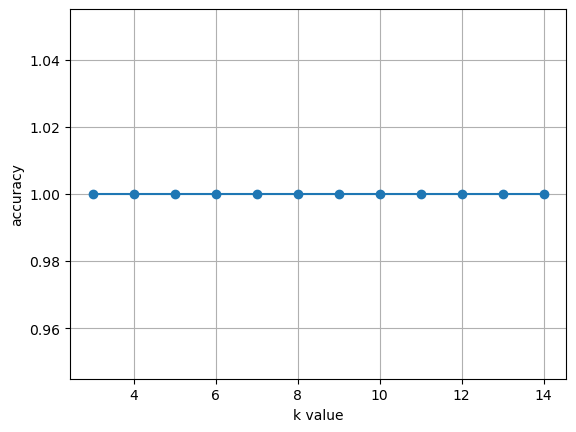

In [196]:
plt.plot(neighbors,metric_k,'o-')#plotting the accuracy for each k value
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [197]:
#accuracy is same for all values.so we can  create model using anyvalue.let it be 10
knn=KNeighborsClassifier(n_neighbors=10)
model2=knn.fit(x_train,y_train)
y_pred_knn=model2.predict(x_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [198]:
print(confusion_matrix(y_test,y_pred_knn))#confusin matrix is used for checking the accuracy ,precision ,recall etc

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [199]:
print(accuracy_score(y_test,y_pred_knn))

1.0


3)SVM

In [200]:
from sklearn.svm import SVC#support vector classifier

  a)SVM kernel=rbf

In [201]:
svm_clf=SVC(kernel='rbf')#kernel choosen is rbf(radial basis function),can also use linear,poly ,bt linear takes more time in building model

In [202]:
svm_model=svm_clf.fit(x_train,y_train)#model creation 

In [203]:
y_pred=svm_model.predict(x_test)#y predictions

In [204]:
confusion_matrix(y_test,y_pred)#confusion matrix of SVM model with kernel=rbf(test_size=0.25 ie 183*0.25=46 data points)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [205]:
accuracy_score(y_test,y_pred)#accuracy of SVM model  with kernel=rbf

1.0

b)SVM kernel=linear

In [206]:
svm_clf_linear=SVC(kernel='linear')#kernel choosen is linear

In [207]:
svm_model_linear=svm_clf.fit(x_train,y_train)#model creation 

In [208]:
y_pred=svm_model_linear.predict(x_test)#y predictions

In [209]:
confusion_matrix(y_test,y_pred)##confusion matrix of SVM model with kernel=linear

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [210]:
accuracy_score(y_test,y_pred)#accuracy of SVM model with kernel=linear

1.0

c)SVM kernel=polynomial

In [211]:
svm_clf_linear=SVC(kernel='poly')

In [212]:
svm_model_poly=svm_clf.fit(x_train,y_train)

In [213]:
y_pred=svm_model_poly.predict(x_test)

In [214]:
confusion_matrix(y_test,y_pred)#confusion matrix of SVM model with kernel=poly

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [215]:
accuracy_score(y_test,y_pred)#accuracy of SVM model with kernel=poly

1.0

4)Decision trees

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
dt_clf= DecisionTreeClassifier(random_state=42)#random state has to be given for decision trees otherwise results changes everytime while executing

In [218]:
dt_model=dt_clf.fit(x_train,y_train)#model creation

In [219]:
y_pred=dt_model.predict(x_test)# y predictions

In [220]:
confusion_matrix(y_test,y_pred)#confusion matrix of Decision tree model

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [221]:
accuracy_score(y_test,y_pred)#accuracy of decision tree model

1.0

5)Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier


In [223]:
rf_clf= RandomForestClassifier(random_state=42)#random state has to be given  otherwise results changes everytime while executing

In [224]:
rf_model=rf_clf.fit(x_train,y_train)#model creation

In [225]:
y_pred=rf_model.predict(x_test)#y predictions

In [226]:
confusion_matrix(y_test,y_pred)#confusion matrix of Random forest model

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [227]:
accuracy_score(y_test,y_pred)#accuracy of Random Forest model

1.0

#conclusion:-
 we get that all the models have same accuracy rate .that is 100%.so we can say that all the models are best for this data set